# Sales Analysis

## Import Necessary Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Cleaning

### Read in updated dataframe

In [10]:
all_data = pd.read_csv('Merged_Data/all_data.csv')

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [12]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Drop all empty rows and reset index (remove old index)

In [13]:
all_data = all_data.dropna().reset_index(drop=True)

### Check for rows were the header repeats

In [14]:
all_data.loc[all_data['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Drop rows were the header repeats

In [15]:
all_data = all_data.loc[all_data['Quantity Ordered'] != 'Quantity Ordered']

### Change Column Data Types

In [16]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [17]:
all_data.loc[:, 'Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
all_data.loc[:, 'Order ID'] = pd.to_numeric(all_data['Order ID'])
all_data.loc[:, 'Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data.loc[:, 'Price Each'] = pd.to_numeric(all_data['Price Each'])

In [18]:
all_data.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## Data Exploration

In [19]:
# This function provides the highest tick in each graph
def last_tick(num, step):
    return int(np.ceil(num/step)) * step + 1

### Question 1: What was the best month for sales? How much was earned that month?

In [20]:
monthly_sales_df = all_data.groupby(all_data['Order Date'].dt.month).sum().sort_values('Order Date').drop('Order ID', axis=1)
monthly_sales_df

,Quantity Ordered,Price Each
Order Date,,
1,10903,1811768.38
2,13449,2188884.72
3,17005,2791207.83
4,20558,3367671.02
5,18667,3135125.13
6,15253,2562025.61
7,16072,2632539.56
8,13448,2230345.42
9,13109,2084992.09


In [21]:
months = pd.to_datetime(monthly_sales_df.index, format='%m')
months.month_name()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Order Date')

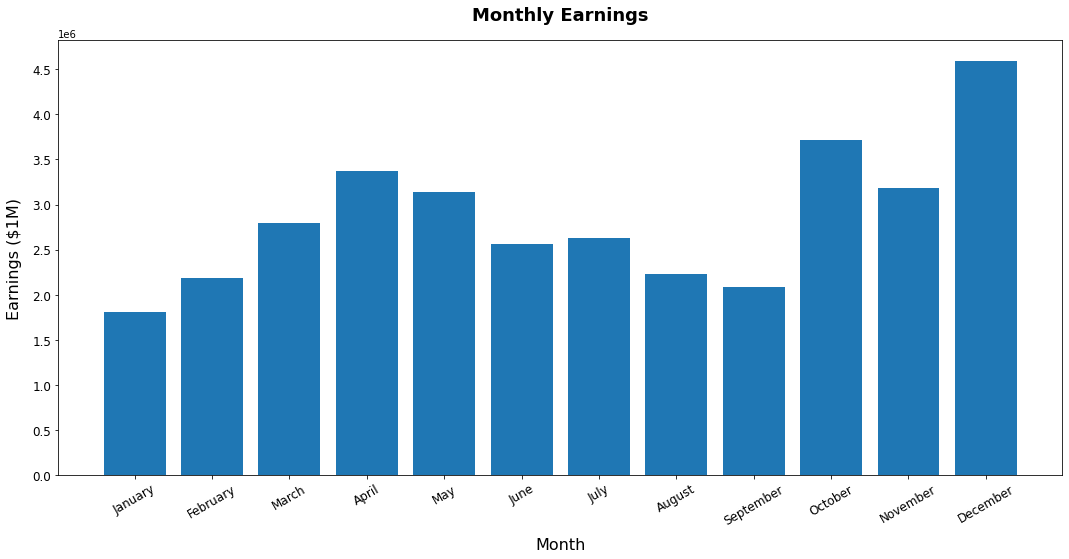

In [37]:
plt.figure(1, figsize=(18,8))
plt.title('Monthly Earnings', fontdict={'fontsize':18, 'fontweight':'bold'}, pad=20)
plt.xlabel('Month', fontdict={'fontsize':16}, labelpad=10)
plt.ylabel('Earnings ($1M)', fontdict={'fontsize':16}, labelpad=10)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(ticks=np.arange(0, last_tick(monthly_sales_df['Price Each'].max(), 500000),step=500000),fontsize=12)
plt.bar(months.month_name(), monthly_sales_df['Price Each'])
plt.show()

>### **Answer:** December was the best month for sales, and earned over 4.5 million dollars.

### Question 2: What city ordered the most product?

In [23]:
addresses = all_data['Purchase Address']
city = addresses.str.extract(r'^[^,]+,\s*([^,]+,\s[A-Z]{2})')
city

,0
0,"Dallas, TX"
1,"Boston, MA"
2,"Los Angeles, CA"
3,"Los Angeles, CA"
4,"Los Angeles, CA"
...,...
186300,"Los Angeles, CA"
186301,"San Francisco, CA"
186302,"San Francisco, CA"
186303,"San Francisco, CA"


In [24]:
all_data['City'] = city
citites_df = all_data.groupby(all_data['City']).sum().sort_values('City')
citites_df

,Order ID,Quantity Ordered,Price Each
City,,,
"Atlanta, GA",3423838407,16602,2779908.20
"Austin, TX",2280982185,11153,1809873.61
"Boston, MA",4598265261,22528,3637409.77
"Dallas, TX",3415643578,16730,2752627.82
"Los Angeles, CA",6811084693,33289,5421435.23
"New York City, NY",5736333884,27932,4635370.83
"Portland, ME",563266345,2750,447189.25
"Portland, OR",2305594747,11303,1860558.22
"San Francisco, CA",10304443952,50239,8211461.74


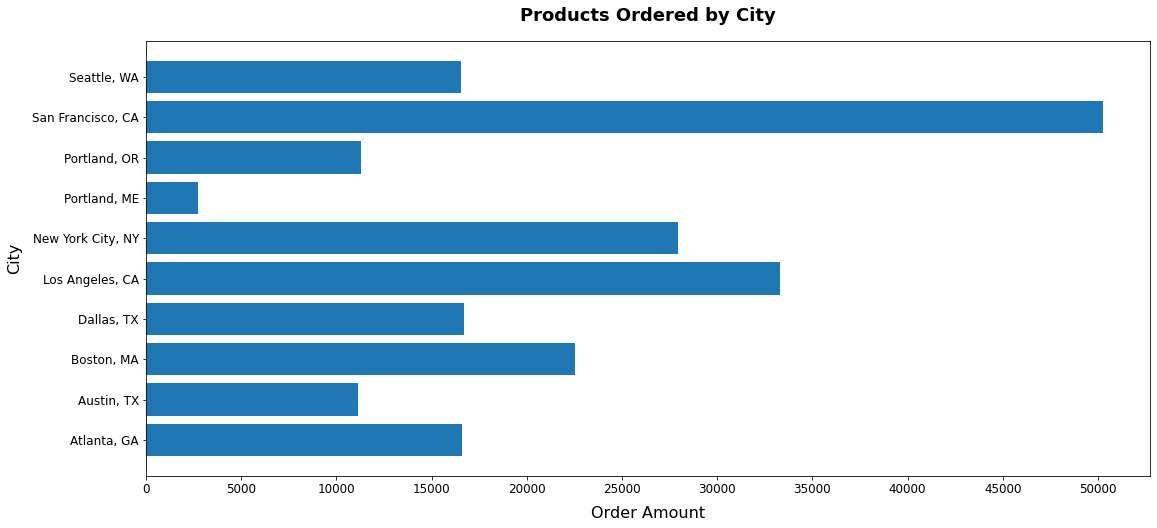

In [25]:
plt.figure(2, figsize=(18,8))
plt.title('Products Ordered by City', fontdict={'fontsize':18, 'fontweight':'bold'}, pad=20)
plt.xlabel('Order Amount', fontdict={'fontsize':16}, labelpad=10)
plt.ylabel('City', fontdict={'fontsize':16}, labelpad=10)
plt.xticks(ticks=np.arange(0, last_tick(citites_df['Quantity Ordered'].max(), 5000), step=5000), fontsize=12)
plt.yticks(fontsize=12)
plt.barh(citites_df.index, citites_df['Quantity Ordered'])
plt.show()

>### **Answer:** San Fransisco ordered the most products.

### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [101]:
sales_time_ser = all_data.groupby(all_data['Order Date'].dt.hour).count().sort_values('Product')['Quantity Ordered']
sales_time_ser = sales_time_ser.sort_index()
sales_time_ser

Order Date
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Quantity Ordered, dtype: int64

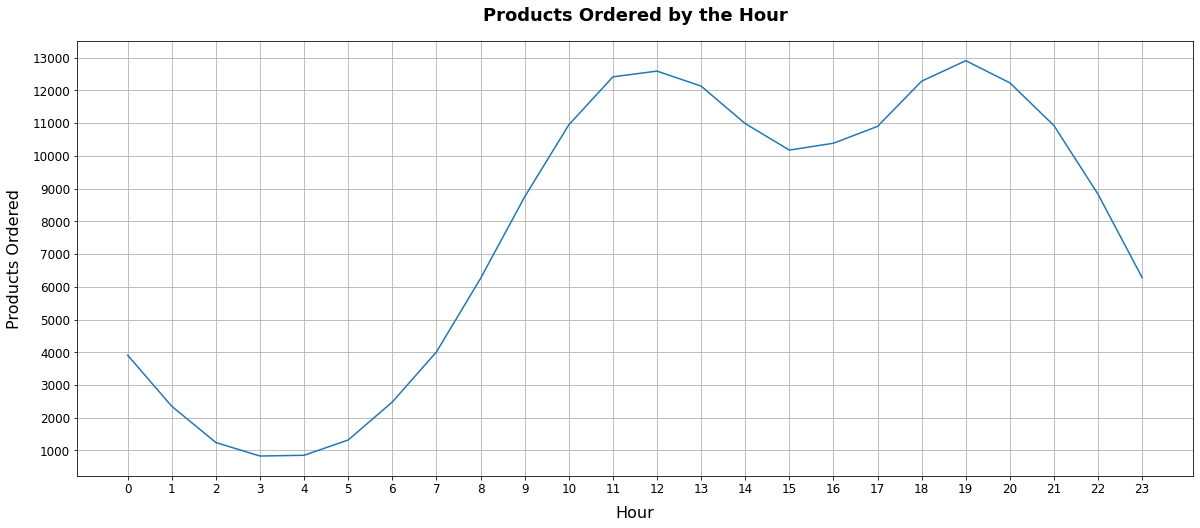

In [41]:
plt.figure(3, figsize=(20,8))
plt.title('Products Ordered by the Hour', fontdict={'fontsize':18, 'fontweight':'bold'}, pad=20)
plt.xlabel('Hour', fontdict={'fontsize':16}, labelpad=10)
plt.ylabel('Products Ordered', fontdict={'fontsize':16}, labelpad=10)
plt.xticks(sales_time_ser.index, fontsize=12)
plt.yticks(np.arange(0, last_tick(sales_time_ser.values.max(),1000), 1000), fontsize=12)
plt.plot(sales_time_ser.index, sales_time_ser.values)
plt.grid()
plt.show()

> ### **Answer:** Due to both 12 and 7 pm being peak order hours, I recomend advertising after 11 am and 6 pm.

### Question 4: What products are most often sold together?

In [28]:
ordered_together_df = all_data.loc[all_data.duplicated(['Order ID'], keep=False) == True, ['Order ID', 'Product']].reset_index(drop=True)
ordered_together_df

,Order ID,Product
0,176560,Google Phone
1,176560,Wired Headphones
2,176574,Google Phone
3,176574,USB-C Charging Cable
4,176585,Bose SoundSport Headphones
...,...,...
14644,259303,AA Batteries (4-pack)
14645,259314,Wired Headphones
14646,259314,AAA Batteries (4-pack)
14647,259350,Google Phone


In [29]:
key_arr = ordered_together_df['Order ID'].unique()
key_arr

array([176560, 176574, 176585, ..., 259303, 259314, 259350], dtype=int64)

In [30]:
order_dict = {}
count = 0
for n in key_arr:
    order_dict[key_arr[count]] = tuple(ordered_together_df.loc[ordered_together_df['Order ID'] == key_arr[count], 'Product'])
    count+=1

In [31]:
order_ser = pd.Series(data=order_dict.values())
order_ser

0                        (Google Phone, Wired Headphones)
1                    (Google Phone, USB-C Charging Cable)
2       (Bose SoundSport Headphones, Bose SoundSport H...
3                  (AAA Batteries (4-pack), Google Phone)
4        (Lightning Charging Cable, USB-C Charging Cable)
                              ...                        
7131    (Apple Airpods Headphones, Apple Airpods Headp...
7132    (iPhone, Lightning Charging Cable, Lightning C...
7133      (34in Ultrawide Monitor, AA Batteries (4-pack))
7134           (Wired Headphones, AAA Batteries (4-pack))
7135                 (Google Phone, USB-C Charging Cable)
Length: 7136, dtype: object

In [42]:
order_freq_ser=order_ser.value_counts()
order_freq_ser.index.astype('string')
order_freq_ser.sort_index()

('20in Monitor', '20in Monitor')                                3
('20in Monitor', '27in FHD Monitor')                            2
('20in Monitor', '34in Ultrawide Monitor')                      1
('20in Monitor', 'AA Batteries (4-pack)')                       6
('20in Monitor', 'AAA Batteries (4-pack)')                      3
                                                             ... 
('iPhone', 'USB-C Charging Cable')                             12
('iPhone', 'Vareebadd Phone')                                   3
('iPhone', 'Wired Headphones')                                361
('iPhone', 'Wired Headphones', 'Lightning Charging Cable')      1
('iPhone', 'iPhone')                                            1
Length: 366, dtype: int64

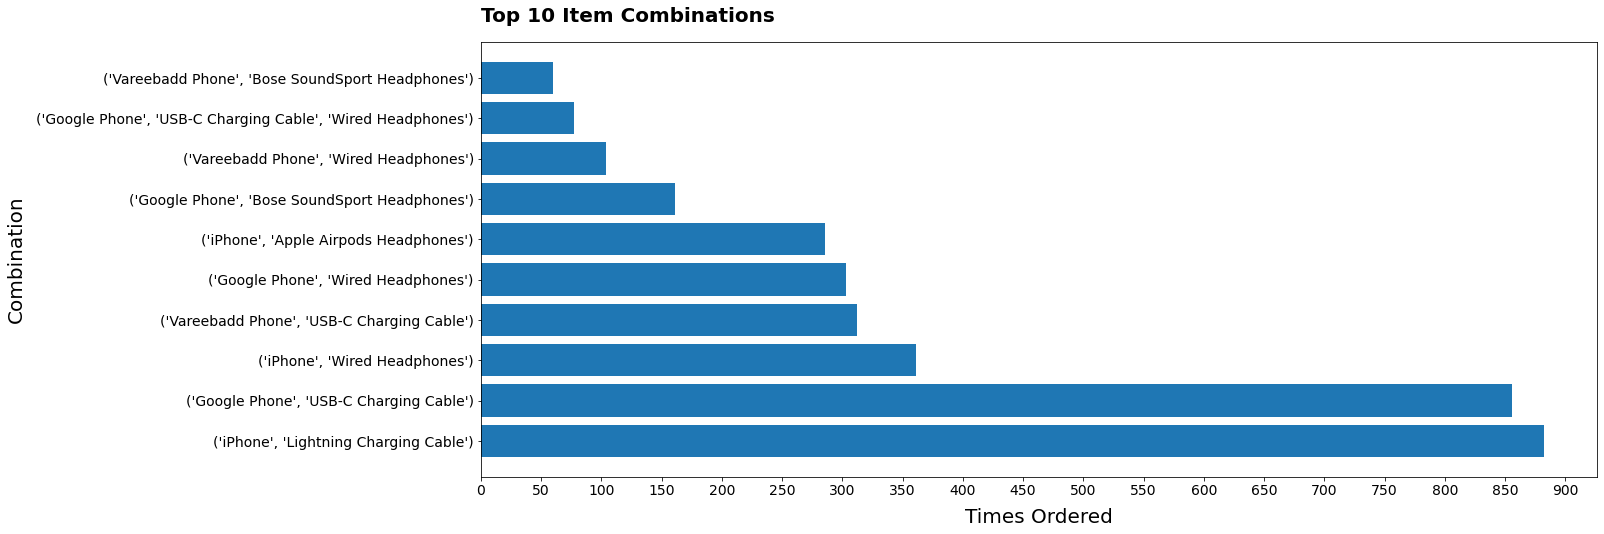

In [33]:
top_items = 10
plt.figure(4, figsize=(20,8))
plt.title('Top ' + str(top_items) + ' Item Combinations', fontdict={'fontsize':20, 'fontweight': 'bold'}, pad=20, loc='left')
plt.xlabel('Times Ordered', fontdict={'fontsize':20}, labelpad=10)
plt.ylabel('Combination', fontdict={'fontsize':20}, labelpad=10)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, last_tick(order_freq_ser.values.max(), 50), 50), fontsize=14)
plt.barh(order_freq_ser.index[:top_items],order_freq_ser.values[:top_items])
plt.show()

> ### **Answer:** The iPhone and Lightning Charging Cable are the products most ordered together.

### Question 5: What product was ordered the most? Why do you think it was ordered the most?

In [48]:
product_count_ser = all_data['Product'].value_counts()
product_count_ser = product_count_ser.sort_index()
product_count_ser

20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Product, dtype: int64

In [55]:
product_price_ser = all_data.groupby('Product').mean()['Price Each']
product_price_ser

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

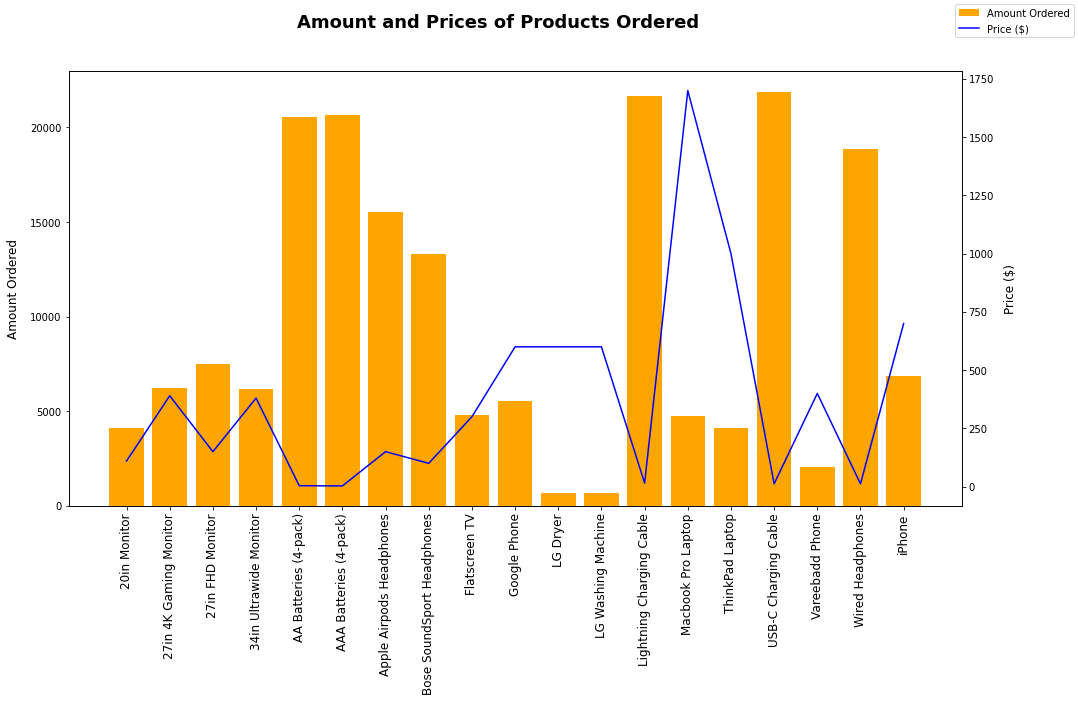

In [103]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_count_ser.index, product_count_ser.values, color='orange')
ax2.plot(product_price_ser.index, product_price_ser.values, color='b')

fig.suptitle('Amount and Prices of Products Ordered ', size=18, weight='bold')
fig.set_size_inches(16,8)
fig.legend(['Amount Ordered','Price ($)'])

ax1.set_ylabel('Amount Ordered', fontdict={'fontsize':12}, labelpad=10)
ax2.set_ylabel('Price ($)', fontdict={'fontsize':12}, labelpad=10)
ax1.set_xticks(product_count_ser.index)
ax1.set_xticklabels(product_count_ser.index, rotation=90, fontdict={'fontsize':12})

plt.show()

> ### **Answer:** The USB-C Charging Cable was the most ordered product. I think it is due mostly to its low price.